<a href="https://colab.research.google.com/github/Ardian747/Pemrograman-Python/blob/main/Ardian%20Eka%20Nugraha%20Tugas%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
cd/content/drive/MyDrive

/content/drive/MyDrive


In [34]:
ls

'1101180330 Registrasi | Telkom University.pdf'
'1101190174_Teaching_Rabu 5.docx'
'1101191067_Teaching_Senin 5.docx'
 556393_GABUNGAN.c
 733614.jpg
 733615.jpg
 733629.jpg
 749397.jpg
 749398.jpg
 758530.jpg
 758531.jpg
 790676.jpg
 790677.jpg
 92/
'Activity List and Project Network Diagram - Ardian Eka N (1101180330).pdf'
 AlasPersegiPanjang.java
'Ardian Eka N (SS Tabung).jpg'
'Ardian Eka Nugraha_Teknik Telekomunikasi - Ardian Eka.rar'
'Ardian Eka Nugraha_Teknik Telekomunikasi.rar'
 AUG.jpeg
 AUG.pdf
'BAP_TE_Ardian Eka Nugraha_1101180330.jpg'
'BAP_TF_Ardian Eka Nugraha_1101180330.jpg'
 Classroom/
 dataset@
 FINAL.c
 GameTebakGambarKelompok1.zip
'Hasil Praktikum_TT_109_Ardian Eka Nugraha_1101180330 (1).rar'
'Hasil Praktikum_TT_109_Ardian Eka Nugraha_1101180330 (2).rar'
'Hasil Praktikum_TT_109_Ardian Eka Nugraha_1101180330 (3).rar'
'Hasil Praktikum_TT_109_Ardian Eka Nugraha_1101180330.rar'
 Hitung.java
'IMG-20180326-WA0106 (1).jpg'
 IMG-20180326-WA0106.jpg
'IMG_20200423_003853 (1).jpg'


In [35]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [36]:
# grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [37]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [38]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [39]:
# encode the labels, converting them from strings to integers 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [40]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [41]:
# perform a troining and testing split, using 75% of the data for 
# training and 25% for evaluation

(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1055, 64, 64, 3)
(352, 64, 64, 3)


In [42]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(12, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_3 (Dense)              (None, 12)               

In [44]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_3 (Dense)              (None, 12)               

In [45]:
# train the model using the Adam optimizer
print ("[INFO] training network...") 
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, 
  metrics=["accuracy"])

H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
33/33 [==============================] - 2s 71ms/step - loss: 2.4506 - accuracy: 0.1564 - val_loss: 2.3546 - val_accuracy: 0.2045
Epoch 2/25
33/33 [==============================] - 2s 69ms/step - loss: 2.2540 - accuracy: 0.2265 - val_loss: 2.1792 - val_accuracy: 0.2528
Epoch 3/25
33/33 [==============================] - 2s 71ms/step - loss: 2.0236 - accuracy: 0.3024 - val_loss: 2.0132 - val_accuracy: 0.2756
Epoch 4/25
33/33 [==============================] - 2s 70ms/step - loss: 1.7830 - accuracy: 0.3981 - val_loss: 1.7380 - val_accuracy: 0.4460
Epoch 5/25
33/33 [==============================] - 2s 69ms/step - loss: 1.5547 - accuracy: 0.4749 - val_loss: 1.6171 - val_accuracy: 0.4602
Epoch 6/25
33/33 [==============================] - 2s 70ms/step - loss: 1.3685 - accuracy: 0.5384 - val_loss: 1.5136 - val_accuracy: 0.5227
Epoch 7/25
33/33 [==============================] - 2s 69ms/step - loss: 1.2035 - accuracy: 0.6142 - val_loss: 1.5161 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


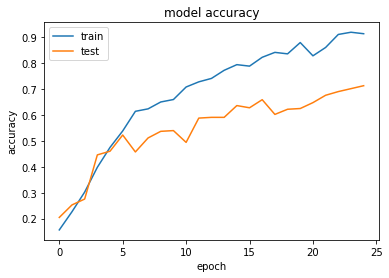

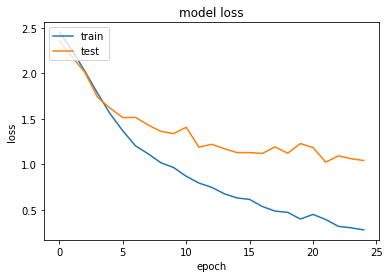

In [46]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)

[INFO] evaluating network...


In [48]:
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      GMB_01       0.75      0.77      0.76        31
      GMB_02       0.83      0.76      0.79        33
      GMB_03       0.74      0.80      0.77        25
      GMB_04       0.81      0.53      0.64        32
      GMB_05       0.82      0.79      0.81        29
      GMB_06       0.68      0.70      0.69        33
      GMB_07       0.56      0.75      0.64        36
      GMB_08       0.86      0.72      0.78        25
      GMB_09       0.77      0.83      0.80        29
      GMB_10       0.70      0.54      0.61        26
      GMB_11       0.47      0.63      0.54        30
      nonGMB       0.85      0.74      0.79        23

    accuracy                           0.71       352
   macro avg       0.74      0.71      0.72       352
weighted avg       0.73      0.71      0.72       352



In [50]:
model1.save('model_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_scene/assets


In [54]:
import cv2
import matplotlib.pyplot as plt
imagess='Daun.jpg'

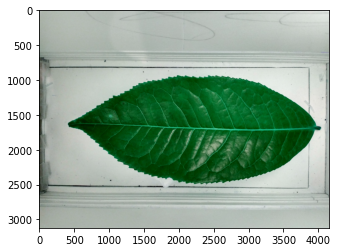

In [55]:
img_array = cv2.imread(imagess)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [57]:
image_testing = Image.open ('Daun.jpg')
image_testing = np.array(image_testing.resize((64,64))) / 255.0
image_testing.shape

(64, 64, 3)

In [58]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [60]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[3.3598286e-01 3.0424252e-01 1.4095281e-02 3.4672040e-02 1.7159294e-03
  7.2139845e-04 3.3648428e-02 6.8086141e-05 2.4446193e-08 2.5982955e-01
  1.5022056e-02 1.9351908e-06]]
['GMB_01']
